# Stereographic Projection to 3D bloch sphere

In [473]:
import qiskit
from math import pi
import numpy as np
from PIL import Image
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector

In [480]:
def project(img, h_img, w_img, h_proj, w_proj):

    (row, col, _) = img
    x = row
    y = col
    z = 0
    print("x,y,z = ",x,y,z)
    Q = np.array([x, y, z], dtype=np.float32)
    X = get_2d_to_3d(Q)
    return X

def get_2d_to_3d(point):
    [x, y, z] = point
    k = round(4 / (x**2 + y**2 + 4), 4)
    print("k = ", k)

    return np.array([k * x, k * y, 1-2*k ])

## Project 3X3 Pixel on Bloch Sphere

In [475]:
import os
os.path.abspath('')

'c:\\Users\\HCI\\Desktop\\Stereo'

In [476]:
path_img_3 = 'pixel3x3.png'
path_img_3 = os.path.join(os.path.abspath(''),
                            path_img_3)
print(path_img_3)

c:\Users\HCI\Desktop\Stereo\pixel3x3.png


In [483]:
pix3 = np.array(Image.open(path_img_3))

h_img = pix3.shape[0]
w_img = pix3.shape[1]
h_proj_3 = 3
w_proj_3 = 3

x = 0.6

pixel = np.array([[-3*x,x,0],[0,x,0],[x,x,0],
                   [-2*x,0,0],[6*x,0,0],
                 [-5*x,-5*x,0],[0,-3*x,0],[x,-2*x,0]])

point_2d = []
point_3d = []


for i in pixel:
    sphere = project(i,h_img, w_img, h_proj_3, w_proj_3)
    point_2d.append(i)
    point_3d.append(sphere)

# print('point_2d = ', point_2d)
print('point_3d = ', point_3d)

x,y,z =  -1.7999999999999998 0.6 0
k =  0.5263
x,y,z =  0.0 0.6 0
k =  0.9174
x,y,z =  0.6 0.6 0
k =  0.8475
x,y,z =  -1.2 0.0 0
k =  0.7353
x,y,z =  3.5999999999999996 0.0 0
k =  0.2358
x,y,z =  -3.0 -3.0 0
k =  0.1818
x,y,z =  0.0 -1.7999999999999998 0
k =  0.5525
x,y,z =  0.6 -1.2 0
k =  0.6897
point_3d =  [array([-0.94733997,  0.31578001, -0.0526    ]), array([ 0.        ,  0.55044002, -0.8348    ]), array([ 0.50850002,  0.50850002, -0.695     ]), array([-0.88236004,  0.        , -0.4706    ]), array([0.84887998, 0.        , 0.5284    ]), array([-0.5454, -0.5454,  0.6364]), array([ 0.        , -0.99449997, -0.105     ]), array([ 0.41382002, -0.82764003, -0.3794    ])]
[[]]


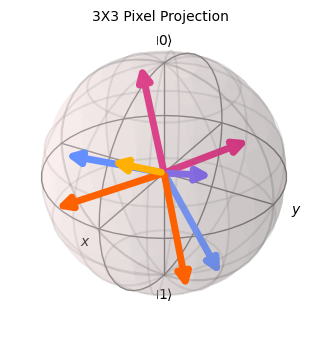

In [471]:
plot_bloch_vector(point_3d, title='3X3 Pixel Projection', figsize=(3,3))

In [472]:
k = round( 4 /(pixel[0][0]**2 + pixel[0][1]**2 + 4),4)
k

0.5263

## Project 2X2 Pixel on Bloch Sphere

In [668]:
path_img_2 = 'pixel2x2.png'
path_img_2 = os.path.join(os.path.abspath(''),
                            path_img_2)
print(path_img_2)

c:\Users\HCI\Desktop\Stereo\pixel2x2.png


In [681]:
pix2 = np.array(Image.open(path_img_2))

h_img = pix2.shape[0]
w_img = pix2.shape[1]
h_proj_2 = 2
w_proj_2 = 2

x = 0.8

proj_2 = np.array([[x,x,0],
                 [-1.6*x,1.6*x,0],
                 [-1.5*x,-1.5*x,0],
                 [x,-x,0]])

point_2d = []
point_3d = []

for i in proj_2:
    sphere = project(i, h_img, w_img, h_proj_2, w_proj_2)
    point_2d.append(i)    
    point_3d.append(sphere)

print('point_2d = ', point_2d)
print('point_3d = ', point_3d)

x,y,z =  0.8 0.8 0
k =  0.7576
x,y,z =  -1.2800000000000002 1.2800000000000002 0
k =  0.5497
x,y,z =  -1.2000000000000002 -1.2000000000000002 0
k =  0.5814
x,y,z =  0.8 -0.8 0
k =  0.7576
point_2d =  [array([0.8, 0.8, 0. ]), array([-1.28,  1.28,  0.  ]), array([-1.2, -1.2,  0. ]), array([ 0.8, -0.8,  0. ])]
point_3d =  [array([ 0.60608001,  0.60608001, -0.5152    ]), array([-0.70361598,  0.70361598, -0.0994    ]), array([-0.69768003, -0.69768003, -0.1628    ]), array([ 0.60608001, -0.60608001, -0.5152    ])]


In [675]:
point_3d[0] = np.array([point_3d[0][0]/0.8475,point_3d[0][1]/0.8475,0])
point_3d[0]

array([0.71513865, 0.71513865, 0.        ])

[array([ 0.60608001,  0.60608001, -0.5152    ]), array([-0.70361598,  0.70361598, -0.0994    ]), array([-0.69768003, -0.69768003, -0.1628    ]), array([ 0.60608001, -0.60608001, -0.5152    ])]


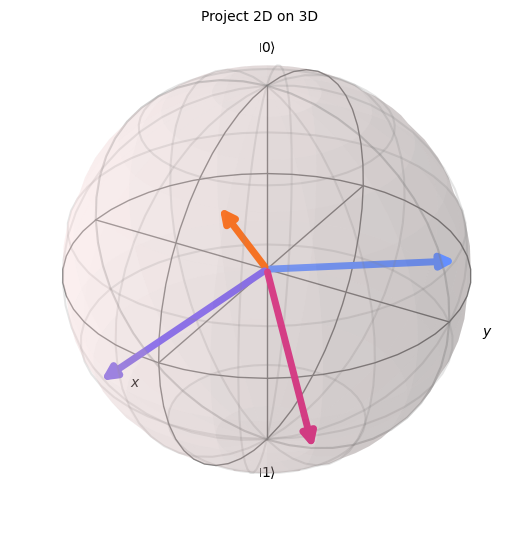

In [682]:
print(point_3d)
plot_bloch_vector(point_3d, title='Project 2D on 3D')

[array([0.6, 0.6, 0. ]), array([-0.6,  0.6,  0. ]), array([-1.2, -0.6,  0. ]), array([ 3., -3.,  0.])]


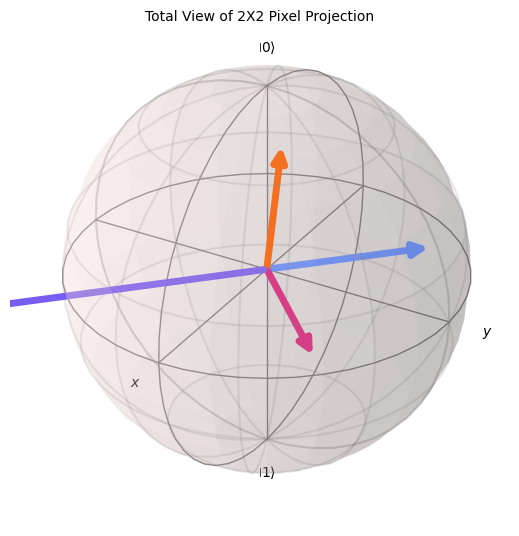

In [487]:
print(point_2d)
plot_bloch_vector(point_2d, title='Total View of 2X2 Pixel Projection')

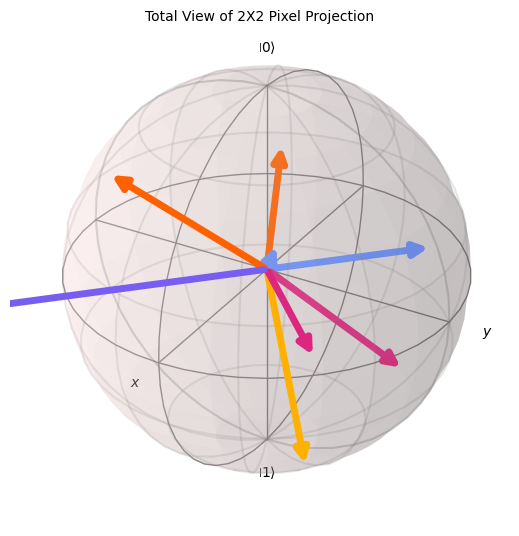

In [251]:
plot_bloch_vector(point_2d+point_3d, title='Total View of 2X2 Pixel Projection')

## Project 1X1 Pixel on Bloch Sphere

In [252]:
path_img_1 = 'pixel1x1.png'
path_img_1 = os.path.join(os.path.abspath(''),
                            path_img_1)
print(path_img_1)

c:\Users\HCI\Desktop\Stereo\pixel1x1.png


In [254]:
pix1 = np.array(Image.open(path_img_1))

h_img = pix1.shape[0]
w_img = pix1.shape[1]
h_proj_2 = 1
w_proj_2 = 1

x = 0.5

proj_1 = np.array([[x,0,0]])

point_2d = []
point_3d = []

for i in proj_1:
    sphere = project(i, h_img, w_img, h_proj_2, w_proj_2)
    point_2d.append(i)    
    point_3d.append(sphere)

x,y,z =  0.5 0.0 0
k =  0.9412


point_3d =  [array([ 0.4706,  0.    , -0.8824])]


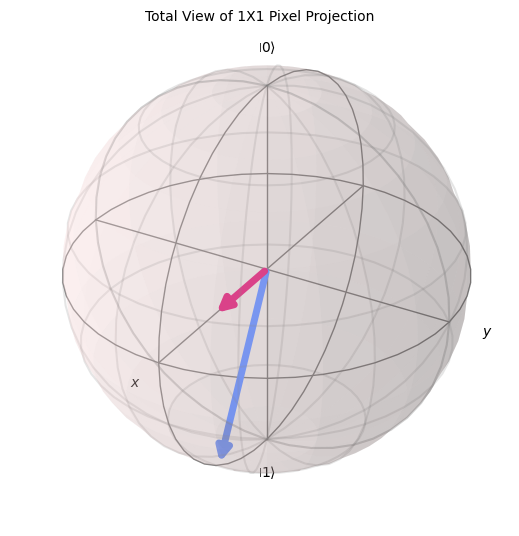

In [255]:
print('point_3d = ', point_3d)
plot_bloch_vector(point_2d+point_3d, title='Total View of 1X1 Pixel Projection')


# 1 X 1 Pixel Re-Projection

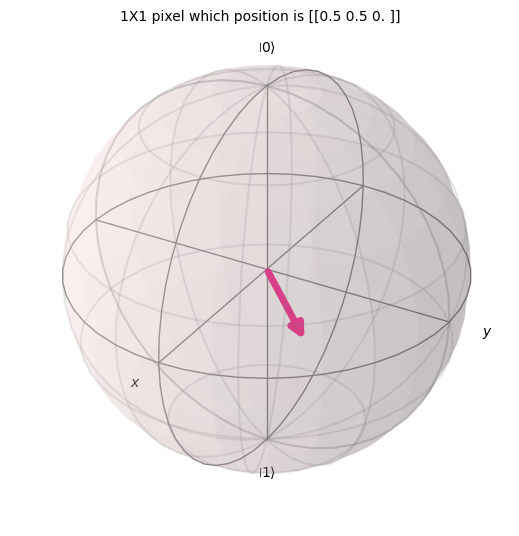

In [458]:
Q = np.array([[0.5,0.5,0]])

plot_bloch_vector(Q, title = f'1X1 pixel which position is {Q}')

In [459]:
h_img = Q.shape[0]
w_img = Q.shape[1]
h_proj_2 = 1
w_proj_2 = 1

x = 0.5

point_2d = []
point_3d = []

for i in Q:
    P = project(i, h_img, w_img, h_proj_2, w_proj_2)
    point_2d.append(i)    
    point_3d.append(P)

x,y,z =  0.5 0.5 0
k =  0.8889


point_2d =  [array([0.5, 0.5, 0. ])]
point_3d =  [array([ 0.44445,  0.44445, -0.7778 ])]


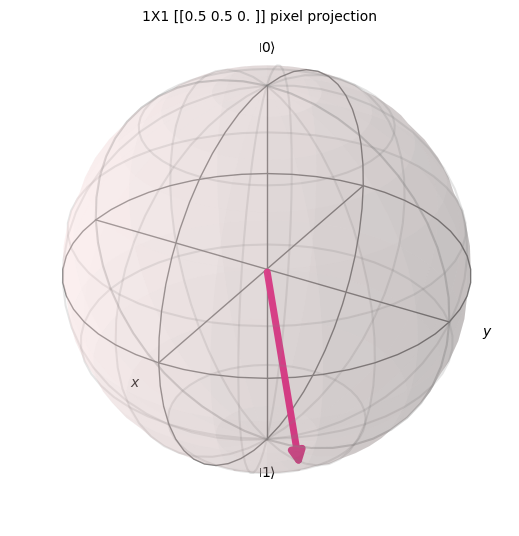

In [460]:
print('point_2d = ', point_2d)
print('point_3d = ', point_3d)
plot_bloch_vector(P, title = f'1X1 {Q} pixel projection')

## Method 1

Use k value to re-project projected point

[0.5 0.5 0. ]


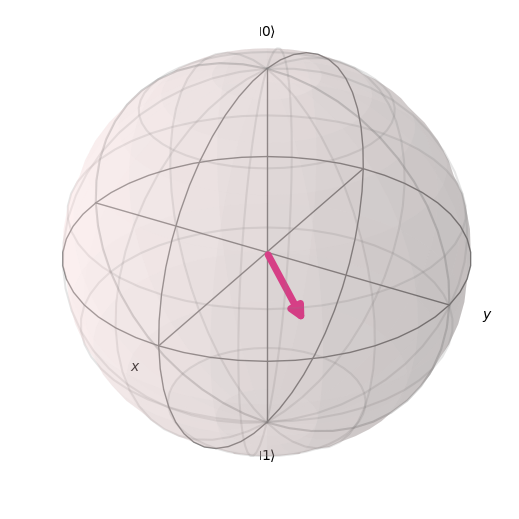

In [462]:
k = round( 4 /(Q[0][0]**2 + Q[0][1]**2 + 4),4)
Q_re = np.array([P[0]/k,P[1]/k, 0])
print(Q_re)
plot_bloch_vector(Q_re)

## Method 2

Use theta and phi to re-project projected point

In [439]:
def reproject(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)
    x_, y_, z_ = Q[0]
    Q_size = np.sqrt(x_**2 + y_**2)
    x_proj = round((np.cos(phi)*Q_size),4)
    y_proj = round((np.sin(phi)*Q_size),4)
    z_proj = 0
    a = np.cos(theta/2) # 0 state's coefficient
    b = complex(np.cos(phi),np.sin(phi))*np.sin(theta/2) # 1 state's coefficient
    print("( x_proj, y_proj, z_proj ) = ", (x_proj, y_proj, z_proj))

    return [x_proj, y_proj, z_proj]

( x_proj, y_proj, z_proj ) =  (0.5, 0.5, 0)


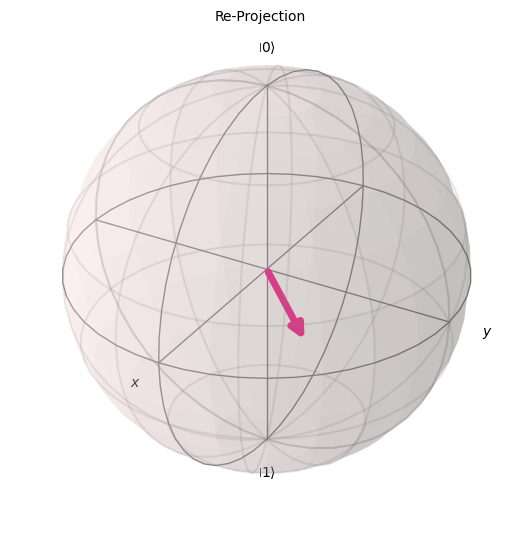

In [440]:
Q_2 = reproject(P)

plot_bloch_vector(Q_2, title = "Re-Projection")

x,y,z =  0.5 0.5 0
k =  0.8889


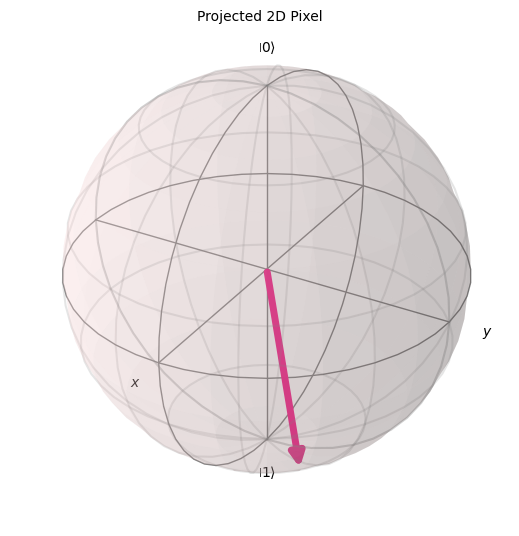

In [441]:
plot_bloch_vector(project(Q_2, 1, 1, 1, 1), title='Projected 2D Pixel')

# 1 x 1 Pixel Projection with QuantumCircuit

## Represent 1 X 1 Pixel with QuantumCircuit using Hadamard Gate and Rotation Gate

2D plane 상의 어떤 픽셀의 좌표가 주어질 경우, 해당 픽셀을 QuantumGate를 통해 Bloch Sphere로 Project 시켜보자.

In [499]:
import qiskit
from math import pi
import numpy as np
from PIL import Image
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector

In [443]:
Q = np.array([2,-2,0]) # Given Pixel Coordinate

classic_P = project(Q,1,1,1,1)

x,y,z =  2 -2 0
k =  0.3333


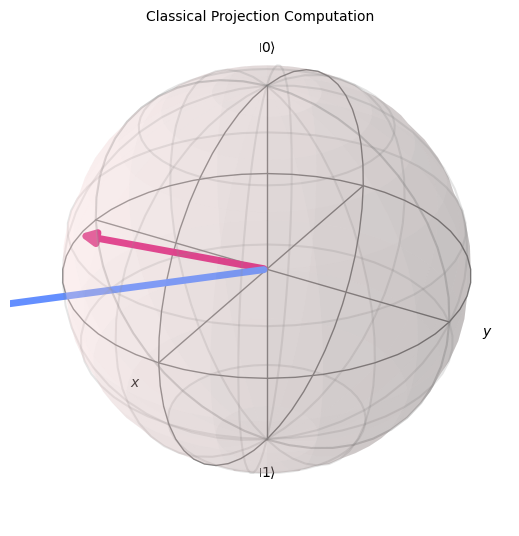

In [444]:
plot_bloch_vector([classic_P]+[Q], title = 'Classical Projection Computation')

#### 주어진 2D pixel coordinate의 각도를 찾아서 Quantum gate에 대입하여 구현

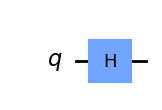

In [445]:
from qiskit import QuantumCircuit

qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.draw('mpl')

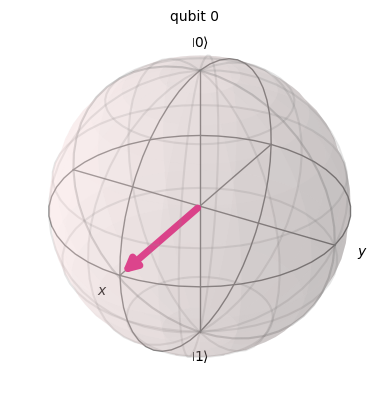

In [446]:
state = Statevector.from_instruction(qc1)
plot_bloch_multivector(state)

phi =  -0.7853981633974483


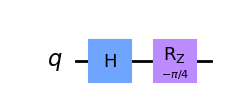

In [447]:
phi = np.arctan2(Q[1],Q[0])
print("phi = ", phi)
qc1.rz(phi,0)

qc1.draw('mpl')

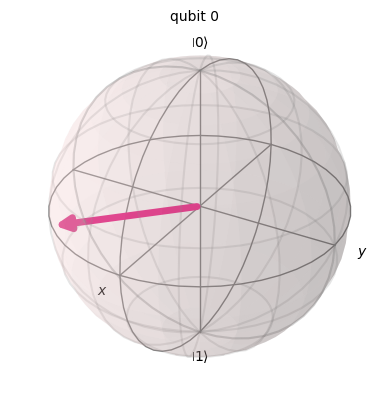

In [448]:
state = Statevector.from_instruction(qc1)
plot_bloch_multivector(state)

#### QuantumCircuit을 구현하면서 교차검증

Statevector([0.65328148+0.27059805j, 0.65328148-0.27059805j],
            dims=(2,))


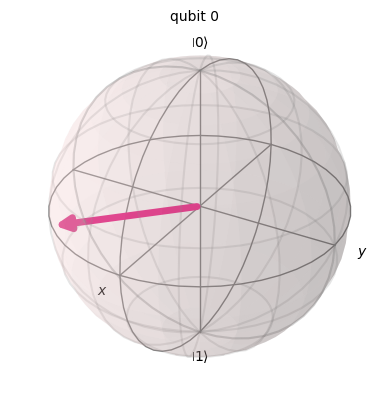

In [449]:
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.rz(-pi/4,0)

state2 = Statevector.from_instruction(qc2)
print(state2)
plot_bloch_multivector(state2)

In [56]:
# 각도를 대입할때 radian 그대로 대입하는게 맞게 나옴

## Cartesian coordinate를 구한 다음 Stereographic Projection

x,y,z =  2 -2 0
k =  0.3333


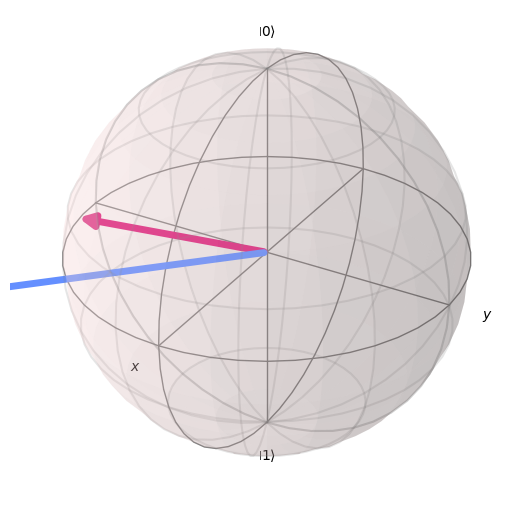

In [450]:
Classic_P = project(Q,1,1,1,1)
plot_bloch_vector([Classic_P]+[Q])

0.3333 2.6664
theta =  0.33993119664381394


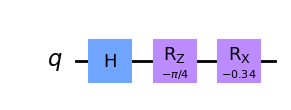

In [451]:
# Classical Computation을 통해 Projection 된 좌표를 구한 다음 theta값 구하기

x, y = Q[0:2]
k = round(4 / (x**2 + y**2 + 4), 4)
Inner = Q.dot(Classic_P)
print(k, Inner)
theta =  np.arccos(Inner / 
                (np.sqrt((x**2 + y**2)) * np.sqrt(((k * x)**2 + (k * y)**2 + (2*(1-k)-1)**2 ))))

print("theta = ", theta)
qc1.rx(-theta, 0)
qc1.draw('mpl')

Statevector([0.68963932+0.37720044j, 0.59809684-0.15619735j],
            dims=(2,))


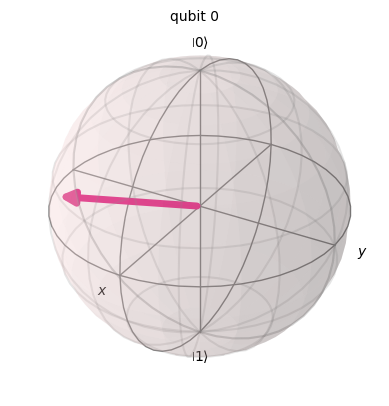

In [452]:
state = Statevector.from_instruction(qc1)
print(state)
plot_bloch_multivector(state)

In [453]:
# QuantumCircuit의 Quantum gate를 지난 state의 theta 각도 계산 검증
from math import cos, sin
print(state)
m = 0
for i in range(2):
    m += state[i]
print(m)
m = m / (np.sqrt(2) * cos(phi/2))
theta_quantum = 2 * np.arccos(np.real(m))
print(theta_quantum)

Statevector([0.68963932+0.37720044j, 0.59809684-0.15619735j],
            dims=(2,))
(1.2877361588295582+0.22100309144770414j)
0.3399311966438136


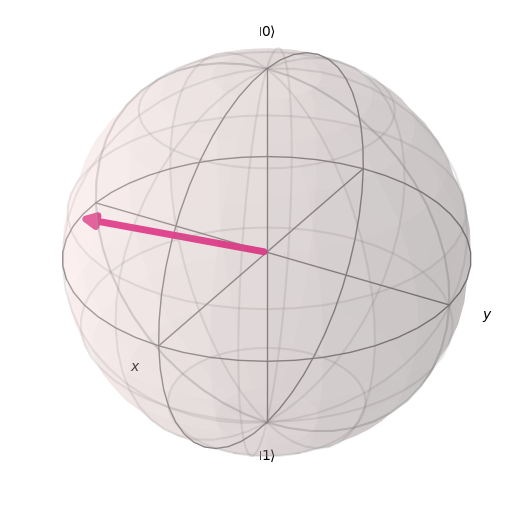

In [454]:
plot_bloch_vector([1,np.pi/2-theta,phi], coord_type = 'spherical')

(x, y) =  2.0000000000000004 -2.0000000000000004


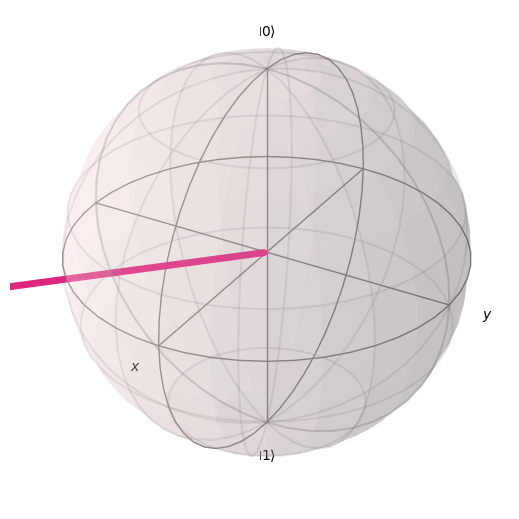

In [455]:
# Cartesian coordinate를 구하면서 Resize를 동시에 실행
x, y = np.real(np.cos(phi)), np.real(np.sin(phi))
q_x, q_y = Q[0], Q[1]

x, y = x * np.sqrt((q_x)**2+(q_y)**2) , y * np.sqrt((q_x)**2+(q_y)**2)

print("(x, y) = ", x, y)

plot_bloch_vector([x,y,0])


## Resize 1 X 1 Pixel and Represent 1 X 1 Pixel Again

In [447]:
# QuantumCircuit을 통해 표현된 벡터는 basis vector가 |0>, |1> 이므로 
# 계수를 따로 구해서 각도를 얻어야함

Previous state =  Statevector([0.5+0.7j, 0.1-0.5j],
            dims=(2,))
phi =  (2.2764455350240413-0.31029225606572186j)
Resized state =  Statevector([0.35355339+0.49497475j, 0.07071068-0.35355339j],
            dims=(2,))


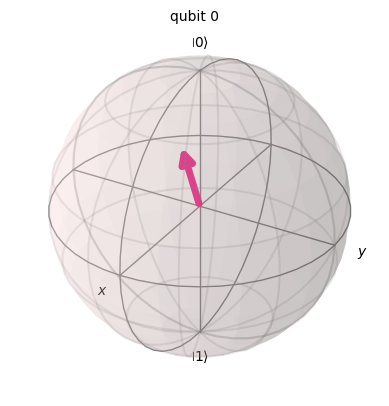

In [16]:
from math import cos, sin
state = Statevector.from_instruction(qc1)

print("Previous state = ", state)

t = 0
for i in range(2):
    t += state[i]

phi_bloch = 2 * np.arccos(np.sqrt(2) * t/2) # Rotation around Z-axis 의 경우 회전 각도의 절반이 exponential의 지수 term으로 들어가므로 마지막에 2배를 해줌.

print("phi = ", phi_bloch )

state = Statevector([state[0]/np.sqrt(2), state[1]/np.sqrt(2)] )

print("Resized state = ", state)

plot_bloch_multivector(state)

In [451]:
# Resize한 값을 출력해보면 크기는 맞으나 그림 속 벡터의 크기가 이상하게 작게 나오는 현상이 있음

In [62]:
x, y = np.real(np.cos(phi_bloch)), np.real(np.sin(phi_bloch)) 
print("(x, y) = ", x, y)
x, y = x / np.sqrt(2) , y / np.sqrt(2)
plot_bloch_vector([x,y,0] )
Qixel = np.array([x,y,0])
print(x,y)

(x, y) =  -0.6799999999999999 0.7981298484391766
-0.4808326112068522 0.5643630280987331


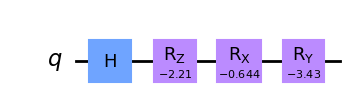

In [18]:

k = round(2 / (x**2 + y**2 + 1), 4)

P = np.array([k * x, k * y , k-1])

theta = - 2 * np.arccos(Q.dot(P) / 
                (np.sqrt((x**2 + y**2)) * np.sqrt(((k*x)**2 + (k*y)**2 + ((k-1)**2) ))))

qc1.ry(theta, 0)

qc1.draw('mpl')

In [63]:
print(theta, k)

0.6435011087932843 1.6


Statevector([0.5+0.7j, 0.1-0.5j],
            dims=(2,))


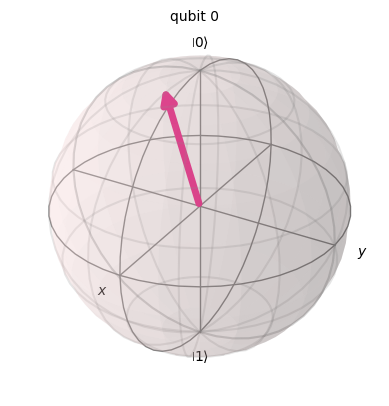

In [64]:
state = Statevector.from_instruction(qc1)
print(state)
plot_bloch_multivector(state)

In [65]:
def reproject_2(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)

    x_proj = round((np.cos(phi)/ np.tan(pi/2-theta/2)),4)
    y_proj = round((np.sin(phi)/ np.tan(pi/2-theta/2)),4)
    z_proj = 0

    a = np.cos(theta/2)
    b = complex(np.cos(phi),np.sin(phi))*np.sin(theta/2)
    print("( x_proj, y_proj, z_proj ) = ", (x_proj, y_proj, z_proj))

    return [x_proj, y_proj, z_proj]

## Compose QuantumCircuit that translated 2D image

In [570]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from qiskit.quantum_info import Statevector

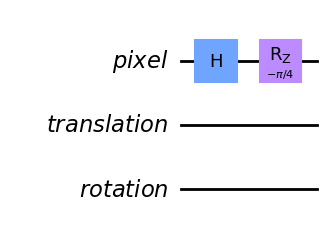

In [597]:
Q = np.array([0.8,-0.8,0]) # Given Pixel Coordinate

phi = np.arctan2(Q[1],Q[0])

pixel = QuantumRegister(size=1, name='pixel')
translation = QuantumRegister(size=1, name='translation')
rotation = QuantumRegister(size=1, name = 'rotation')

qc_t = QuantumCircuit(pixel,translation, rotation)
qc_t.h(0)
qc_t.rz(phi,0)
qc_t.draw('mpl')

x,y,z =  0.8 -0.8 0
k =  0.7576
Inner =  0.9697280144500733
theta =  0.5412118176069253


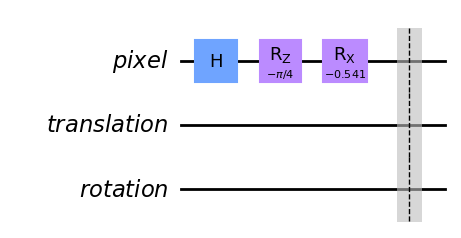

In [598]:
x, y = Q[0:2]
k = round(4 / (x**2 + y**2 + 4), 4)
P = project(Q,1,1,1,1)
Inner = Q.dot(P)
print("Inner = ", Inner)
theta =  np.arccos(Inner / 
                (np.sqrt((x**2 + y**2)) * np.sqrt(((k * x)**2 + (k * y)**2 + (1-2*k)**2 ))))
print("theta = ", theta)

qc_t.rx(-theta, 0)
qc_t.barrier()
qc_t.draw('mpl')

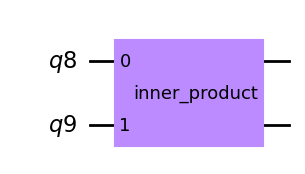

In [667]:
from qiskit.circuit.library import InnerProduct
Inner = InnerProduct(1)
Inner.draw('mpl')

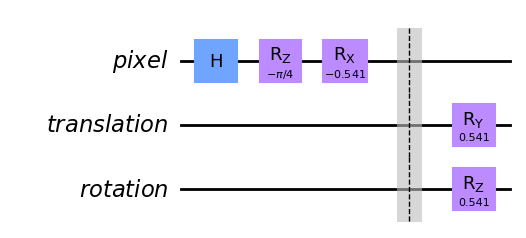

In [599]:
qc_t.ry(theta,1)
qc_t.rz(theta,2)
qc_t.draw('mpl')

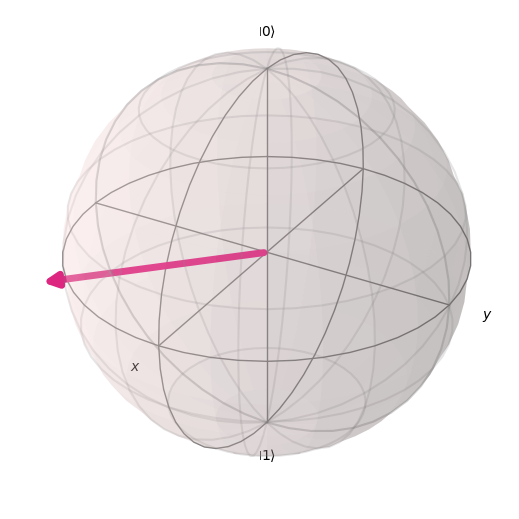

In [600]:
plot_bloch_vector(Q)

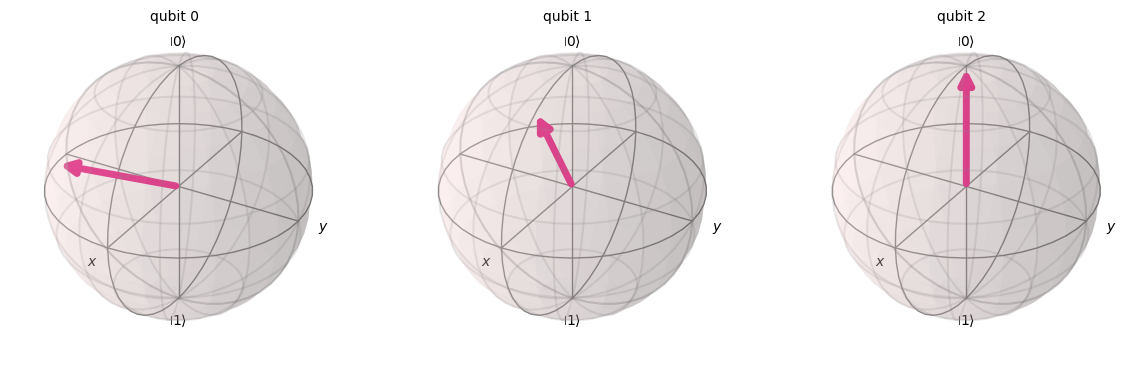

In [601]:
state = Statevector.from_instruction(qc_t)
plot_bloch_multivector(state)

In [586]:
P = project(Q,1,1,1,1)

x,y,z =  0.8 -0.8 0
k =  0.7576


[ 0.60608001 -0.60608001 -0.5152    ]


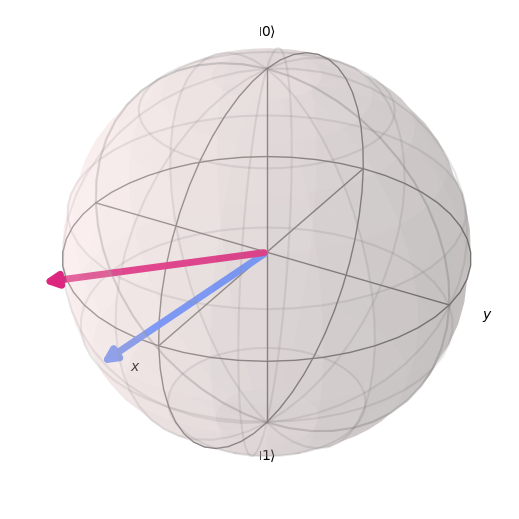

In [587]:
print(P)
plot_bloch_vector([Q]+[P])

In [602]:
qc=  QuantumCircuit(1)

0.026144 3.8889000000000005
theta =  1.246553700817408


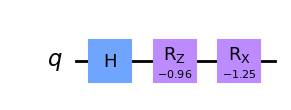

In [405]:
# Classical Computation을 통해 Projection 된 좌표를 구한 다음 theta값 구하기

x,y,z = Q
k = round(4 / (x**2 + y**2 + 4), 6)
Inner = Q.dot(P)
print(k, Inner)
theta =  np.arccos(Inner / 
                (np.sqrt((x**2 + y**2)) * np.sqrt(((k * x)**2 + (k * y)**2 + (2*(1-k)-1)**2 ))))

print("theta = ", theta)
qc.rx(-theta, 0)
qc.draw('mpl')

Statevector([0.69986491+0.63123761j, 0.31865197+0.10094114j],
            dims=(2,))


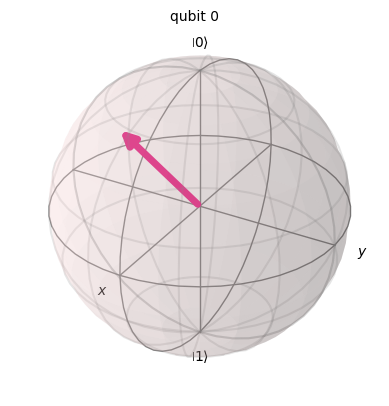

In [406]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

### Q(x,y,0) 에서 Q(x+u,y,0) 로 이동하는 것을 Bloch Sphere 상에서 회전을 통해 구현

In [274]:
# Q는 어차피 Bloch Sphere 상의 P좌표에서 x,y 값과 크기만을 이용할 것이므로 
# x->x+u으로 이동시키면서, y 값은 변하지않는, 쓰지 않을 값인 z 값을 모두 만족시키는 회전인
#Rygate의 각 rho를 구하면 된다.

In [408]:
Q = np.array([7,-10,0])
P = project(Q,1,1,1,1)
x,y,z = Q
k = round(4 / (x**2 + y**2 + 4), 4)
print("Q = ", Q, "P = ", P, "k = ", k)

x,y,z =  7 -10 0
k =  0.0261
Q =  [  7 -10   0] P =  [ 0.1827 -0.261   0.9478] k =  0.0261


In [409]:
# Q를 projection한 P를 얼마나 회전하면 
# x -> x+u 만큼 이동한 좌표 Q' 의 projection P' 을 구할 수 있을까?

# Input : P 

def rho(u, P):
    x,y,z = P
    k = (1 - z) / 2
    print("k = ", k)
    print("P = ", P)
    cosplus  = ( (x+u)*x + (1/k-2)*np.sqrt( (1/k-2)**2 - 2 * u * x -u**2) ) / ((1/k-2)**2+x**2)
    cosminus = ( (x+u)*x - (1/k-2)*np.sqrt( (1/k-2)**2 - 2 * u * x -u**2) ) / ((1/k-2)**2+x**2)
    print("cosine plus = ", cosplus,"cosine minus = ", cosminus)
    return np.arccos(cosplus)


In [410]:
rho(3, P)

k =  0.026100000000000012
P =  [ 0.1827 -0.261   0.9478]
cosine plus =  0.9965803299964539 cosine minus =  -0.9956984675265003


0.08272388780349418

In [411]:
def reproject(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)
    x_, y_, z_ = Q[0]
    Q_size = np.sqrt(x_**2 + y_**2)
    x_proj = round((np.cos(phi)*Q_size),4)
    y_proj = round((np.sin(phi)*Q_size),4)
    z_proj = 0
    a = np.cos(theta/2) # 0 state's coefficient
    b = complex(np.cos(phi),np.sin(phi))*np.sin(theta/2) # 1 state's coefficient
    print("( x_proj, y_proj, z_proj ) = ", (x_proj, y_proj, z_proj))

    return [x_proj, y_proj, z_proj]

k =  0.026100000000000012
P =  [ 0.1827 -0.261   0.9478]
cosine plus =  0.9965803299964539 cosine minus =  -0.9956984675265003


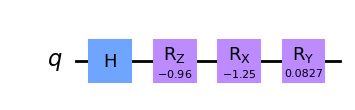

In [412]:
qc.ry(rho(3,P),0)
qc.draw('mpl')

state =  Statevector([0.68609002+0.6265238j , 0.34731895+0.12695658j],
            dims=(2,))


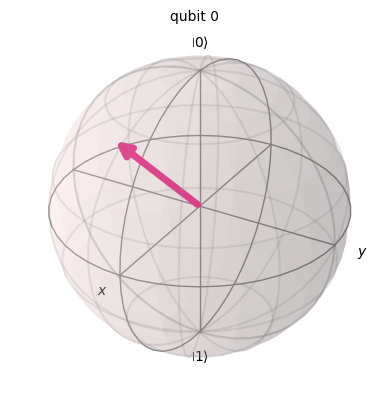

In [413]:
state = Statevector.from_instruction(qc)
print("state = ", state)
plot_bloch_multivector(state)

In [414]:
angle = 0.0827
Ry = np.array([[np.cos(angle),0,np.sin(angle)],
               [0,1,0],
               [-np.sin(angle),0, np.cos(angle)]])
Rotated = Ry.dot(P)

print("Q=", Q, "P=",P,"Rotated P = ", Rotated)

Q= [  7 -10   0] P= [ 0.1827 -0.261   0.9478] Rotated P =  [ 0.26036933 -0.261       0.92946863]


In [415]:
Q_ = np.array([Rotated[0]* Q[1]/Rotated[1], Rotated[1] * Q[1]/Rotated[1],0])
Q_

array([  9.9758364, -10.       ,   0.       ])

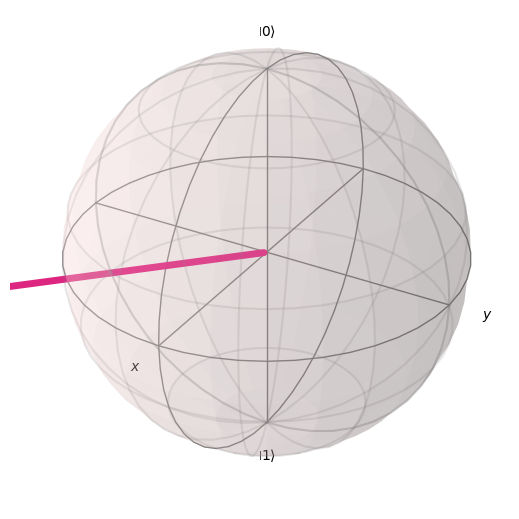

In [419]:
plot_bloch_vector(Q_)

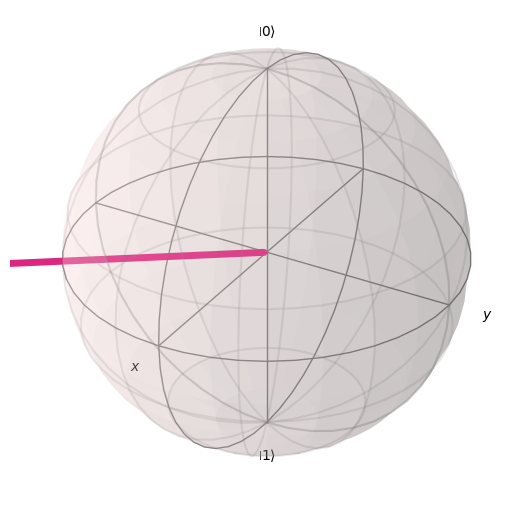

In [420]:
plot_bloch_vector(Q)

## Q(x,y,0)가 $\theta$ 만큼 회전한 경우를 Bloch Sphere 상에서 회전을 통해 구현

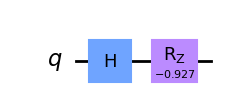

In [541]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from qiskit.quantum_info import Statevector

Q = np.array([3,-4,0])

qc_r = QuantumCircuit(1)
qc_r.h(0)
phi = np.arctan2(Q[1],Q[0])
qc_r.rz(phi,0)
qc_r.draw('mpl')

x,y,z =  3 -4 0
k =  0.1379


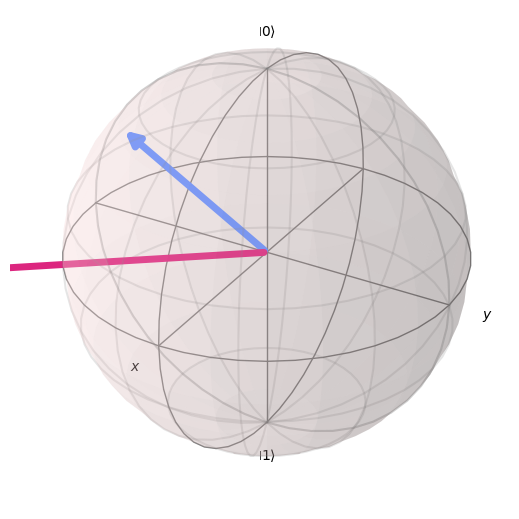

In [542]:
P = project(Q,1,1,1,1)
plot_bloch_vector([Q]+[P])

0.137931 3.4475
theta =  0.8099977707714004


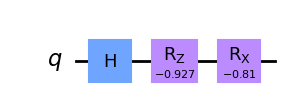

In [543]:
x,y,z = Q
k = round(4 / (x**2 + y**2 + 4), 6)
Inner = Q.dot(P)
print(k, Inner)
theta =  np.arccos(Inner / 
                (np.sqrt((x**2 + y**2)) * np.sqrt(((k * x)**2 + (k * y)**2 + (2*(1-k)-1)**2 ))))

print("theta = ", theta)
qc_r.rx(-theta, 0)
qc_r.draw('mpl')

Statevector([0.70589102+0.53984453j, 0.45669232-0.04144714j],
            dims=(2,))


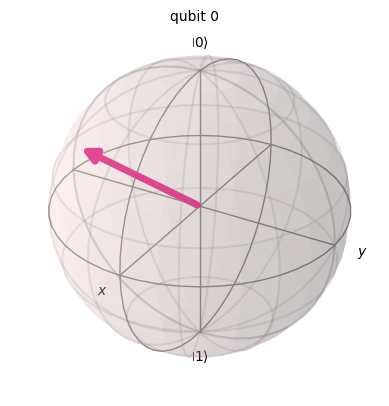

In [537]:
state = Statevector.from_instruction(qc_r)
print(state)
plot_bloch_multivector(state)

Previous state =  Statevector([0.70589102+0.53984453j, 0.45669232-0.04144714j],
            dims=(2,))
phi =  (1.5034116542794351-0.9910862171888885j)
Resized state =  Statevector([0.49914033+0.38172773j, 0.32293024-0.02930755j],
            dims=(2,))


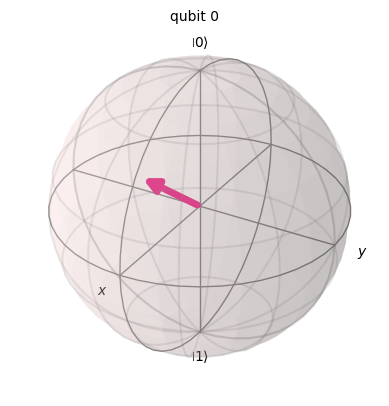

In [531]:
print("Previous state = ", state)

t = 0
for i in range(2):
    t += state[i]

phi_bloch = 2 * np.arccos(np.sqrt(2) * t/2) # Rotation around Z-axis 의 경우 회전 각도의 절반이 exponential의 지수 term으로 들어가므로 마지막에 2배를 해줌.

print("phi = ", phi_bloch )

state = Statevector([state[0]/np.sqrt(2), state[1]/np.sqrt(2)] )

print("Resized state = ", state)

plot_bloch_multivector(state)

In [532]:
x, y = np.real(np.cos(phi_bloch)), np.real(np.sin(phi_bloch)) 
print("(x, y) = ", x, y)
plot_bloch_vector([x,y,0] )
Qixel = np.array([x,y,0])
print(x,y)

(x, y) =  0.10320007608274681 1.5291879434901892
0.10320007608274681 1.5291879434901892


### 만약 Q(x,y,0) 을 30도 만큼 회전시키는 경우

#### 2D image를 회전시킨 경우

In [538]:
from math import pi
Q_xy = np.array([[3],
              [-4]])

Rot = np.array([[np.cos(pi/6), -np.sin(pi/6)],
                [np.sin(pi/6),np.cos(pi/6)]])
Q_prime = Rot.dot(Q_xy) 
Q_prime

array([[ 4.59807621],
       [-1.96410162]])

#### Bloch Sphere를 통해 회전시키는경우

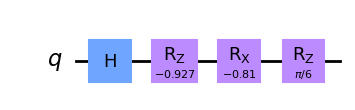

In [544]:
qc_r.rz(pi/6,0)
qc_r.draw('mpl')

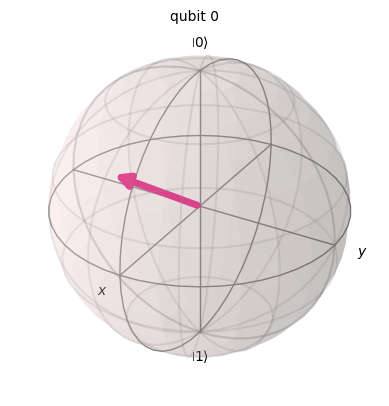

In [545]:
state = Statevector.from_instruction(qc_r)
plot_bloch_multivector(state)

## Time Complexity Analysis

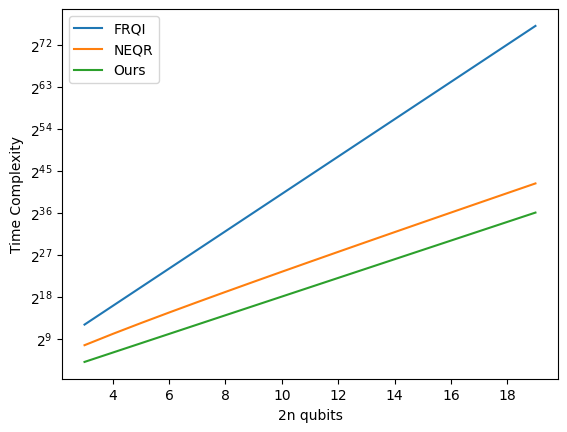

In [665]:
import matplotlib.pyplot as plt

# n qubits can represent 2**n pixels. Thus, Total number of used qubits are 2n qubits.

# Big-O represent of FRQI
n = np.arange(3,20)
n = n.astype(np.float64)
y_frqi = 2**(4*n)

# Big-O represent of NEQR
# Assume q = 1 for initial states.

y_neqr = n*2**(2*n)

# Big-O represent of Ours

y_ours = 2**(2*n-2)

plt.plot(n, y_frqi, label = 'FRQI')
plt.plot(n, y_neqr, label = 'NEQR')
plt.plot(n, y_ours, label = 'Ours')
plt.xlabel('2n qubits')
plt.ylabel('Time Complexity')
plt.yscale('log', base=2)
plt.legend()

plt.show()